In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from hmmlearn import hmm

In [2]:
# (1) All factor models take the top 300 liquid stocks and rank them by the factor
# (2) Windsorize top top 10 and bottom 10 stocks (for singular factor models)
# (3) Long/Short 50 stocks each
# Book Value -> Book value per share to identify value stocks as a factor for alpha
# Momentum -> Use 1 month returns as factor for alpha
# AQR -> Multifactor model that creates a synthetic factor that weighs 30% operation margin, 40% Book Value Yield, 
#    and 30% 1 month momentum as a factor for alpha
# Growth -> Multifactor growth model that uses idd (free cash flow per share / share market value)
#    book value per share, 1 month momentum, and dividend per share
spy = pd.read_csv('data/SPY_ADV.csv').drop("Unnamed: 0", axis=1).drop(range(2706, 3330))
bookvalue = pd.read_csv('data/BookValue.csv')
momentum = pd.read_csv('data/Momentum.csv')
aqr = pd.read_csv('data/AQR.csv')
#inverse_bookvalue = pd.read_csv('data/Inverse_BookValue.csv')
famafrench = pd.read_csv('data/FamaFrench.csv')
modifiedfama = pd.read_csv('data/ModifiedFama.csv')
carhart = pd.read_csv('data/carhart.csv')
growth = pd.read_csv('data/Growth.csv')
frenchgrowth = pd.read_csv('data/FrenchGrowth.csv')

In [3]:
df = momentum.drop(momentum.columns[[2, 3, 4]], axis=1)
df = df.rename(columns={'Return': 'Momentum'})
df['BookValue'] = bookvalue.iloc[:,1]
#df['InverseBook'] = inverse_bookvalue.iloc[:,2]
df['AQR'] = aqr.iloc[:,1]
length = df.shape[0]
df['SPY'] = spy.iloc[:,9]
df['FamaFrench'] = famafrench.iloc[:, 1]
df['Growth'] = growth.iloc[:,1]
df['ModifiedFama'] = modifiedfama.iloc[:,1]
df['Carhart'] = carhart.iloc[:,1]

In [4]:
num_models = 8
df = df[:-20]
df.tail()

,Date,Momentum,BookValue,AQR,SPY,FamaFrench,Growth,ModifiedFama,Carhart
2681,2017-08-25,0.340010,-0.341642,0.213778,0.233613,-0.395026,0.050292,0.394295,0.230632
2682,2017-08-28,-0.225368,0.420116,0.187518,0.004093,0.472693,0.202439,0.187487,0.033359
2683,2017-08-29,-0.006172,-0.082503,0.241719,0.114486,-0.050875,0.114404,0.083524,0.301750
2684,2017-08-30,-0.241247,-0.089570,-0.029641,0.473755,-0.232705,0.520399,-0.364990,-0.232389
2685,2017-08-31,0.072489,-0.505501,-0.545515,0.601606,0.498591,0.890927,-0.385517,0.884612


In [5]:
df.to_csv('data/Factors.csv')

In [6]:
returns = df.copy()
returns['SPY'] = spy.iloc[:,9]
for i in range(1, num_models + 1):
    returns.iloc[0, i] = 100000

for i in range(1, returns.shape[0]):
    for j in range(1, num_models + 1):
        returns.iloc[i, j] = returns.iloc[i-1, j] * (100 + returns.iloc[i,j])/100

In [7]:
returns

,Date,Momentum,BookValue,AQR,SPY,FamaFrench,Growth,ModifiedFama,Carhart
0,2007-01-03,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
1,2007-01-04,98660.254117,99442.165201,97726.335982,100212.211226,99049.052008,98545.185972,99096.145539,98728.174262
2,2007-01-05,98241.605788,98505.521767,96653.752781,99412.886730,98986.352729,97361.485924,99171.530221,98224.782135
3,2007-01-08,98717.963150,98474.142819,97207.341817,99872.679489,98782.479835,97563.841307,99137.072841,98366.080183
4,2007-01-09,98792.407941,98168.945348,97152.167899,99787.799384,98829.352332,97959.204885,99548.140243,98480.081903
5,2007-01-10,98299.598544,97511.904338,96518.275145,100120.250411,99520.715046,98278.913988,99557.585568,98640.155848
6,2007-01-11,98949.333589,96486.328668,96093.146429,100558.823674,99931.910588,99357.214527,99715.354358,99128.485034
7,2007-01-12,98618.132555,95857.719630,95261.969191,101322.777156,100869.604939,100467.122656,99557.933143,99699.954260
8,2007-01-16,99255.169601,95725.977683,96041.101145,101124.716741,101248.715908,100460.722352,99623.035200,100435.483708
9,2007-01-17,98809.064517,95599.381827,95097.734865,101167.156439,101397.641647,100434.038784,98946.271372,100194.361781


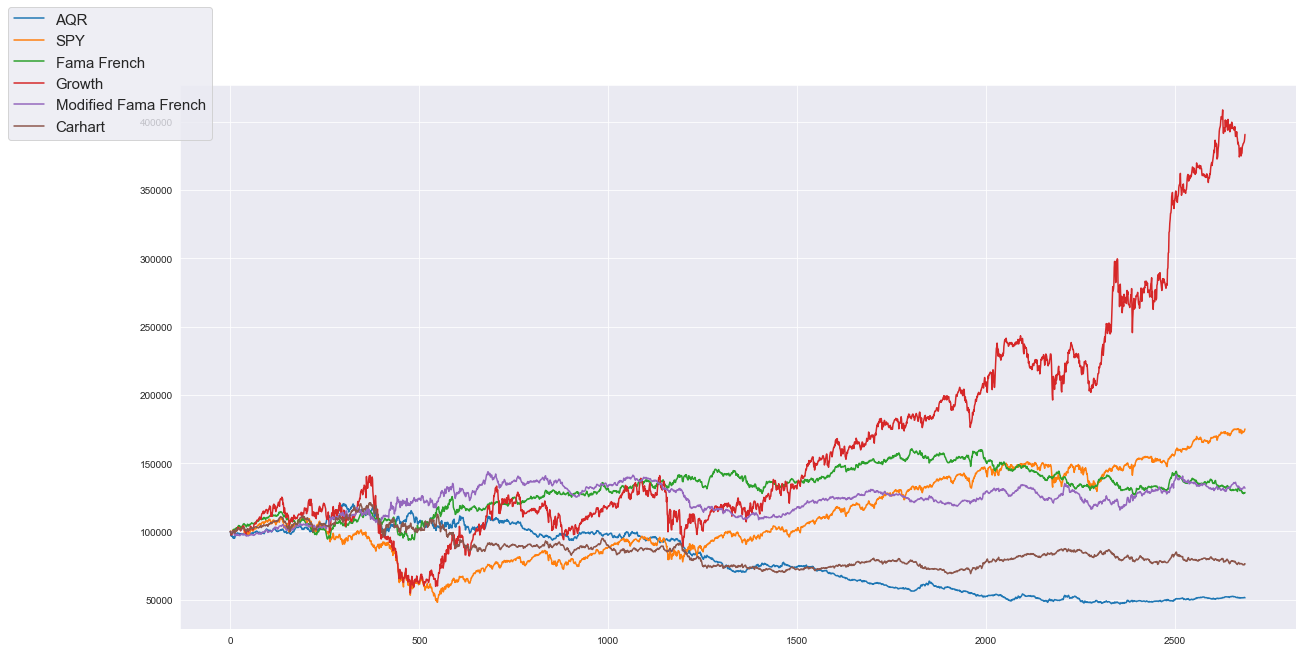

In [8]:
sns.set_style("darkgrid")
plot = plt.figure(figsize=(20,10)) 
#plt.plot(returns.iloc[:,1], label="Momentum",)
#plt.plot(returns.iloc[:,2], label="Book Value",)
plt.plot(returns.iloc[:,3], label="AQR",)
plt.plot(returns.iloc[:,4], label="SPY",)
plt.plot(returns.iloc[:,5], label="Fama French",)
plt.plot(returns.iloc[:,6], label="Growth")
plt.plot(returns.iloc[:,7], label="Modified Fama French")
plt.plot(returns.iloc[:,8], label="Carhart")
plot.legend(loc=2, prop={'size': 15})
plt.show()